In [1]:
#support vector machines

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [3]:
iris = load_iris()

In [4]:
X = iris['data'][:,(2,3)] #petal length and petal width
y = (iris['target'] == 2).astype(np.float64)  #Iris-verginica

In [5]:
svm_clf = Pipeline((
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
))

In [6]:
svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [7]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [8]:
#SVM classifier do not output probabilities for each class

In [9]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [10]:
polynomial_svm_clf = Pipeline((
    ('polynomial', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC()),
))

In [11]:
X, y = make_moons(n_samples=100, noise=0.1)

In [12]:
polynomial_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('polynomial', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [13]:
import matplotlib.pyplot as plt
from pandas import DataFrame

In [14]:
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

In [15]:
colors = {0:'red', 1:'blue'}

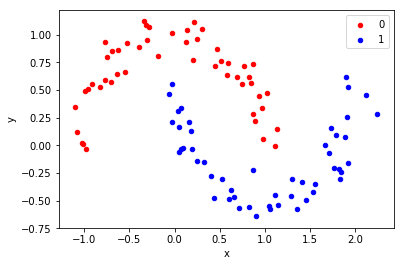

In [16]:
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [17]:
#the kernel trick
#using polynomial kernel

In [18]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline((
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
))

In [19]:
poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [20]:
#Adding similarity features
#it is add features computed using a similarity function that measures how much each instance resembles a
#particular landmark

In [21]:
rbf_kernel_svm_clf = Pipeline((
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001)),
))

In [22]:
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [23]:
#computational complexity
'''
LinearSVC-- O(m*n)   no support for kernel trick
SGDClassifier--O(m*n)    no support for kernel trick
SVC-- O(m**2 * n) to O(m**3 * n)    it support kernel trick
'''

'\nLinearSVC-- O(m*n)   no support for kernel trick\nSGDClassifier--O(m*n)    no support for kernel trick\nSVC-- O(m**2 * n) to O(m**3 * n)    it support kernel trick\n'

In [24]:
#SVM Regression

In [84]:
from sklearn.svm import LinearSVR

In [86]:
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X,y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [87]:
from sklearn.svm import SVR

In [89]:
svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.1, gamma='auto')
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)